In [1]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from utility3 import load_data, plot_lines, run_exp, cluster_plots1, decomp_exp
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict

funky chicken goes cluck cluck CLUCK!!!
clucka clucka!!!


motions shapes: (11678, 64), (11678, 1)
particles shapes: (15233, 7), (15233, 1)


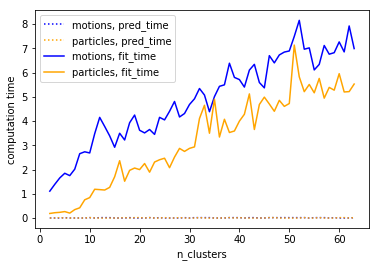

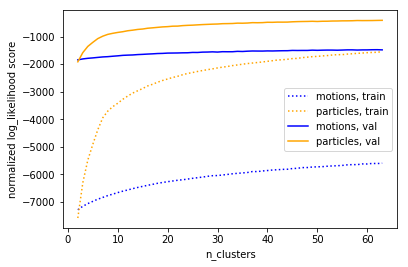

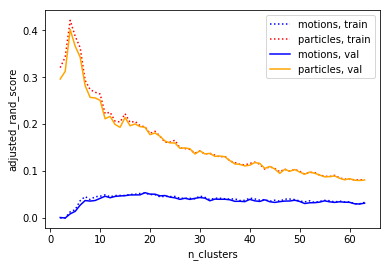

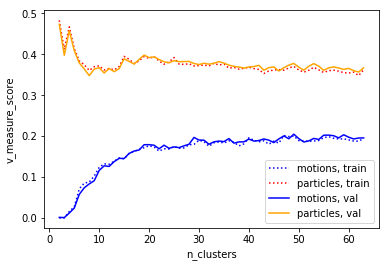

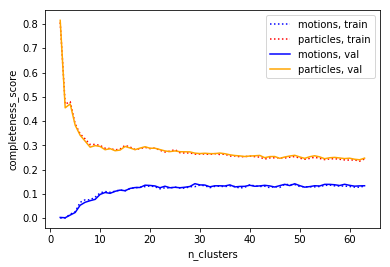

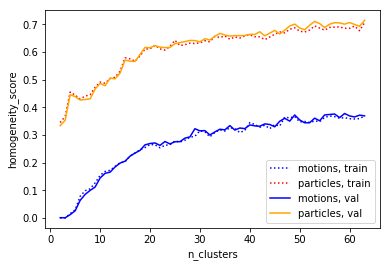

In [19]:
model_type = 'kmeans'       #'kmeans' or 'gaussian mixture'
param_name = 'n_clusters'   #we need to use proper names now... 
param_range = range(2, 64)
other_params = {} #{'n_clusters':4}
metrics = ['adjusted_rand_score', 'v_measure_score', 'completeness_score', 'homogeneity_score']
result1 = run_exp(param_name, param_range, model_type, other_params, metrics)
cluster_plots1(result1, show_computation_time=True, log_likely_score=True)
np.save('result1', result1)

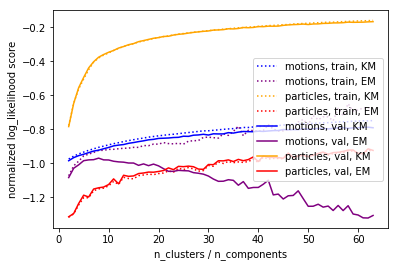

In [32]:
plot_result = np.load('result1.npy').item()
plot_result2 = np.load('result4.npy').item()
#print(plot_result.item())


plt.plot(plot_result['param_range'], np.array(plot_result['score_m'])/7473, color="blue", label="motions, train, KM",
         linestyle=":")
plt.plot(plot_result2['param_range'], np.array(plot_result2['score_m']), color="purple", label="motions, train, EM",
         linestyle=":")

plt.plot(plot_result['param_range'], np.array(plot_result['score_p'])/9748, color="orange", label="particles, train, KM",
         linestyle=":")
plt.plot(plot_result2['param_range'], np.array(plot_result2['score_p']), color="red", label="particles, train, EM",
         linestyle=":")

plt.plot(plot_result['param_range'], np.array(plot_result['score_val_m'])/1869, color="blue", label="motions, val, KM",
         linestyle="-")
plt.plot(plot_result2['param_range'], np.array(plot_result2['score_val_m']), color="purple", label="motions, val, EM",
         linestyle="-")

plt.plot(plot_result['param_range'], np.array(plot_result['score_val_p'])/2438, color="orange", label="particles, val, KM",
         linestyle="-")
plt.plot(plot_result2['param_range'], np.array(plot_result2['score_val_p']), color="red", label="particles, val, EM",
         linestyle="-")
plt.ylabel("normalized log_likelihood score")
plt.xlabel("{} / {}".format(plot_result['param_name'], plot_result2['param_name']))
plt.legend(loc='right')
plt.show()


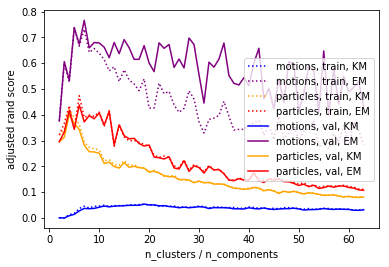

In [24]:
plot_result = np.load('result1.npy').item()
plot_result2 = np.load('result4.npy').item()
#print(plot_result.item())


plt.plot(plot_result['param_range'], np.array(plot_result['adjusted_rand_score_m']), color="blue", label="motions, train, KM",
         linestyle=":")
plt.plot(plot_result2['param_range'], np.array(plot_result2['adjusted_rand_score_m']), color="purple", label="motions, train, EM",
         linestyle=":")

plt.plot(plot_result['param_range'], np.array(plot_result['adjusted_rand_score_p']), color="orange", label="particles, train, KM",
         linestyle=":")
plt.plot(plot_result2['param_range'], np.array(plot_result2['adjusted_rand_score_p']), color="red", label="particles, train, EM",
         linestyle=":")

plt.plot(plot_result['param_range'], np.array(plot_result['adjusted_rand_score_val_m']), color="blue", label="motions, val, KM",
         linestyle="-")
plt.plot(plot_result2['param_range'], np.array(plot_result2['adjusted_rand_score_val_m']), color="purple", label="motions, val, EM",
         linestyle="-")

plt.plot(plot_result['param_range'], np.array(plot_result['adjusted_rand_score_val_p']), color="orange", label="particles, val, KM",
         linestyle="-")
plt.plot(plot_result2['param_range'], np.array(plot_result2['adjusted_rand_score_val_p']), color="red", label="particles, val, EM",
         linestyle="-")
plt.ylabel("adjusted rand score")
plt.xlabel("{} / {}".format(plot_result['param_name'], plot_result2['param_name']))
plt.legend(loc='right')
plt.show()


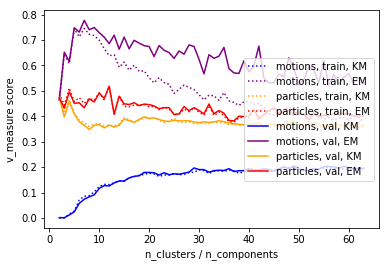

In [33]:
plot_result = np.load('result1.npy').item()
plot_result2 = np.load('result4.npy').item()
#print(plot_result.item())


plt.plot(plot_result['param_range'], np.array(plot_result['v_measure_score_m']), color="blue", label="motions, train, KM",
         linestyle=":")
plt.plot(plot_result2['param_range'], np.array(plot_result2['v_measure_score_m']), color="purple", label="motions, train, EM",
         linestyle=":")

plt.plot(plot_result['param_range'], np.array(plot_result['v_measure_score_p']), color="orange", label="particles, train, KM",
         linestyle=":")
plt.plot(plot_result2['param_range'], np.array(plot_result2['v_measure_score_p']), color="red", label="particles, train, EM",
         linestyle=":")

plt.plot(plot_result['param_range'], np.array(plot_result['v_measure_score_val_m']), color="blue", label="motions, val, KM",
         linestyle="-")
plt.plot(plot_result2['param_range'], np.array(plot_result2['v_measure_score_val_m']), color="purple", label="motions, val, EM",
         linestyle="-")

plt.plot(plot_result['param_range'], np.array(plot_result['v_measure_score_val_p']), color="orange", label="particles, val, KM",
         linestyle="-")
plt.plot(plot_result2['param_range'], np.array(plot_result2['v_measure_score_val_p']), color="red", label="particles, val, EM",
         linestyle="-")
plt.ylabel("v_measure score")
plt.xlabel("{} / {}".format(plot_result['param_name'], plot_result2['param_name']))
plt.legend(loc='right')
plt.show()


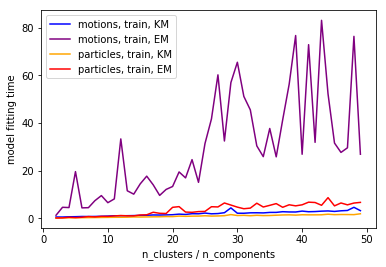

In [72]:
plot_result = result1
plot_result2 = result4

plt.plot(plot_result['param_range'], np.array(plot_result['time_fit_m']), color="blue", label="motions, train, KM",
         linestyle="-")
plt.plot(plot_result2['param_range'], np.array(plot_result2['time_fit_m']), color="purple", label="motions, train, EM",
         linestyle="-")

plt.plot(plot_result['param_range'], np.array(plot_result['time_fit_p']), color="orange", label="particles, train, KM",
         linestyle="-")
plt.plot(plot_result2['param_range'], np.array(plot_result2['time_fit_p']), color="red", label="particles, train, EM",
         linestyle="-")
plt.ylabel("model fitting time")
plt.xlabel("{} / {}".format(plot_result['param_name'], plot_result2['param_name']))
plt.legend(loc='upper left')
plt.show()

motions shapes: (11678, 64), (11678, 1)
particles shapes: (15233, 7), (15233, 1)


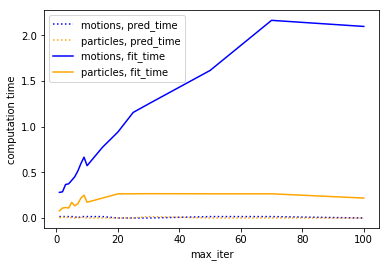

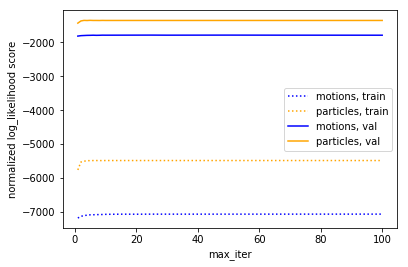

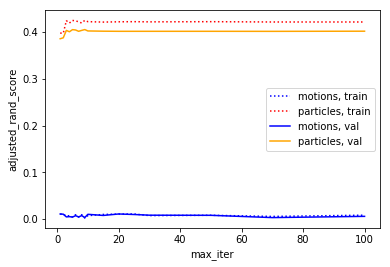

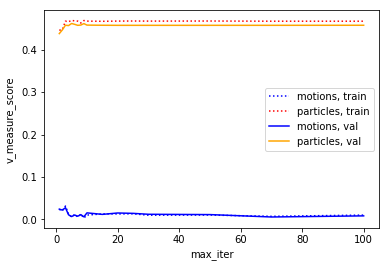

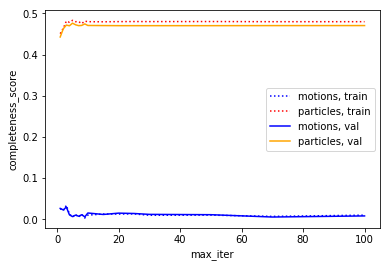

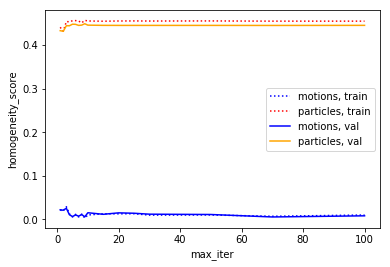

In [5]:
model_type = 'kmeans'       #'kmeans' or 'gaussian mixture'
param_name = 'max_iter'   #we need to use proper names now... 
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 50, 70, 100]
other_params = {'n_clusters':4}
metrics = ['adjusted_rand_score', 'v_measure_score', 'completeness_score', 'homogeneity_score']
result2 = run_exp(param_name, param_range, model_type, other_params, metrics)
cluster_plots1(result2, show_computation_time=True, log_likely_score=True)
np.save('result2', result2)

motions shapes: (11678, 64), (11678, 1)
particles shapes: (15233, 7), (15233, 1)


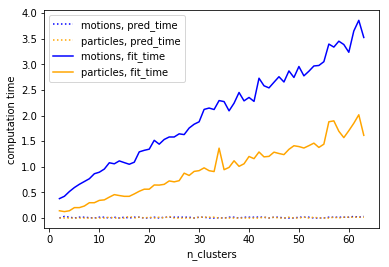

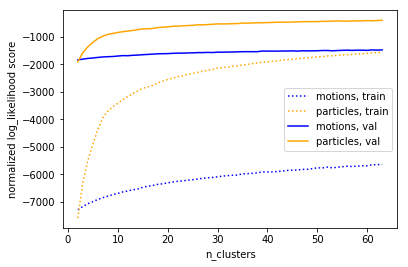

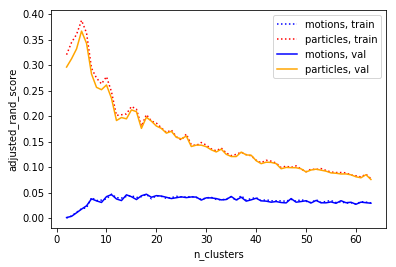

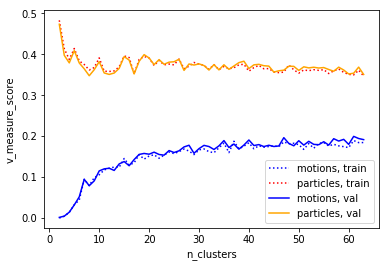

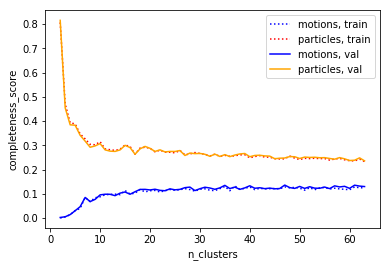

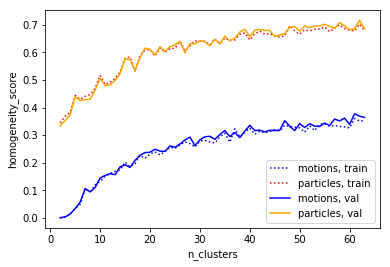

In [2]:
model_type = 'kmeans'       #'kmeans' or 'gaussian mixture'
param_name = 'n_clusters'   #we need to use proper names now... 
param_range = range(2, 64)
other_params = {'max_iter': 10}
metrics = ['adjusted_rand_score', 'v_measure_score', 'completeness_score', 'homogeneity_score']
result3 = run_exp(param_name, param_range, model_type, other_params, metrics, bic=False)
cluster_plots1(result3, show_computation_time=True, log_likely_score=True, bic=False)
np.save('result3', result3)

In [4]:
a = result3['v_measure_score_m'].index(max(result3['v_measure_score_m']))
b = result3['v_measure_score_p'].index(max(result3['v_measure_score_p']))
print("max v_measure at {} for motions", result3['param_range'][a])
print("max v_measure at {} for particles", result3['param_range'][b])

a = result3['adjusted_rand_score_m'].index(max(result3['adjusted_rand_score_m']))
b = result3['adjusted_rand_score_p'].index(max(result3['adjusted_rand_score_p']))
print("max adjusted_rand score at {} for motions", result3['param_range'][a])
print("max adjusted_rand score at {} for particles", result3['param_range'][b])

max v_measure at {} for motions 61
max v_measure at {} for particles 2
max adjusted_rand score at {} for motions 11
max adjusted_rand score at {} for particles 5


motions shapes: (11678, 64), (11678, 1)
particles shapes: (15233, 7), (15233, 1)


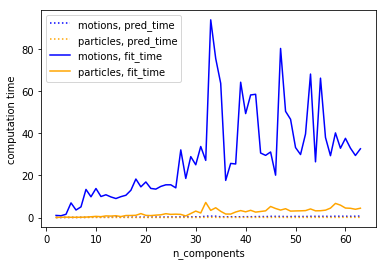

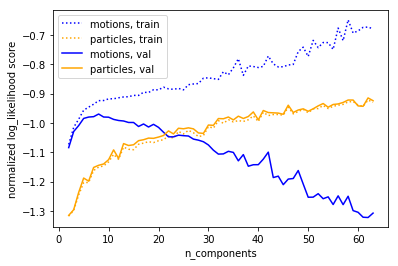

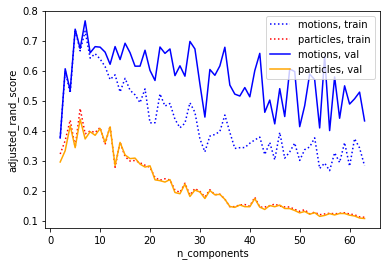

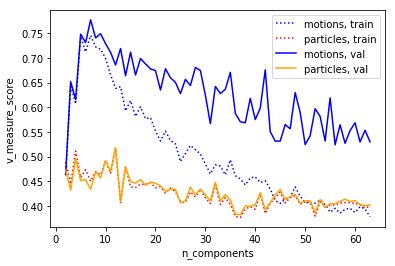

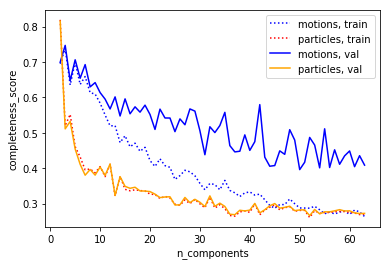

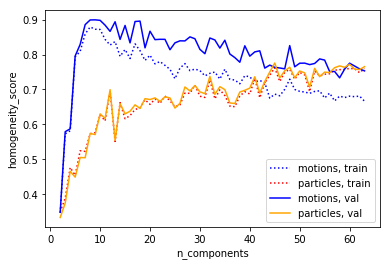

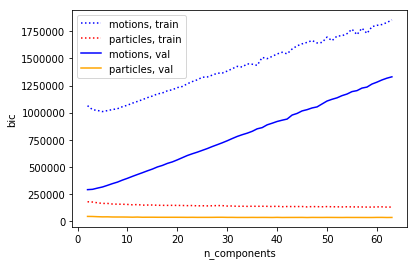

In [7]:
model_type = 'gaussian mixture'         #'kmeans' or 'gaussian mixture'
param_name = 'n_components'             #we need to use proper names now... 
param_range = range(2, 64)
other_params = {}
metrics = ['adjusted_rand_score', 'v_measure_score', 'completeness_score', 'homogeneity_score']
result4 = run_exp(param_name, param_range, model_type, other_params, metrics, bic=True)
cluster_plots1(result4, show_computation_time=True, log_likely_score=True, bic=True)
np.save('result4', result4)

In [10]:
a = result4['v_measure_score_val_m'].index(max(result4['v_measure_score_val_m']))
b = result4['v_measure_score_val_p'].index(max(result4['v_measure_score_val_p']))
print("max v_measure at {} for motions".format(result4['param_range'][a]))
print("max v_measure at {} for particles".format(result4['param_range'][b]))

a = result4['adjusted_rand_score_val_m'].index(max(result4['adjusted_rand_score_val_m']))
b = result4['adjusted_rand_score_val_p'].index(max(result4['adjusted_rand_score_val_p']))
print("max adjusted_rand score at {} for motions".format(result4['param_range'][a]))
print("max adjusted_rand score at {} for particles".format(result4['param_range'][b]))

a = result4['bic_val_m'].index(min(result4['bic_val_m']))
b = result4['bic_val_p'].index(min(result4['bic_val_p']))
print("min bic score at {} for motions".format(result4['param_range'][a]))
print("min bic at {} for particles".format(result4['param_range'][b]))

max v_measure at 7 for motions
max v_measure at 12 for particles
max adjusted_rand score at 7 for motions
max adjusted_rand score at 6 for particles
min bic score at 2 for motions
min bic at 46 for particles


motions shapes: (11678, 64), (11678, 1)
particles shapes: (15233, 7), (15233, 1)


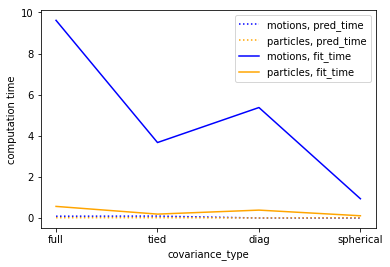

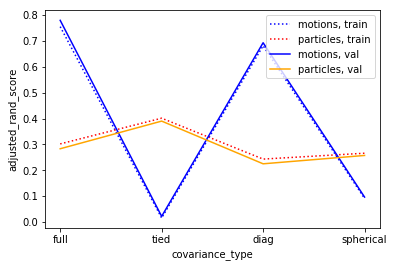

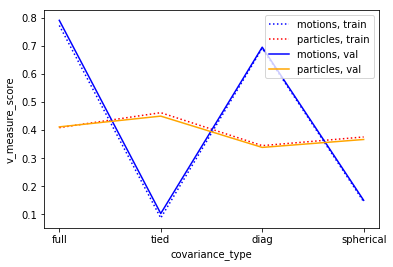

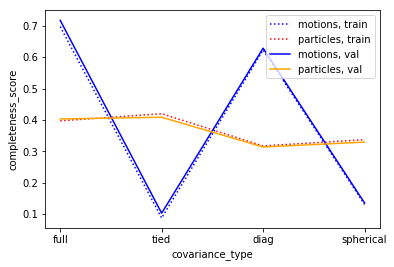

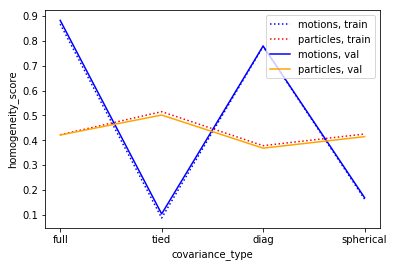

In [13]:
model_type = 'gaussian mixture'
param_name = 'covariance_type'  #we need to use proper names now... 
param_range = ['full', 'tied', 'diag', 'spherical']
other_params = {'n_components':6}
metrics = ['adjusted_rand_score', 'v_measure_score', 'completeness_score', 'homogeneity_score']
result5 = run_exp(param_name, param_range, model_type, other_params, metrics)
cluster_plots1(result5, show_computation_time=True, log_likely_score=True)
np.save('result5', result5)

In [20]:
#Repetitions 
model_type = 'kmeans' #'kmeans' or 'gaussian mixture'
param_name = 'n_clusters'  #we need to use proper names now... 
param_range = [4]*20
other_params = {}#{'n_components':4}
metrics = ['adjusted_rand_score', 'v_measure_score', 'completeness_score', 'homogeneity_score']
result6 = run_exp(param_name, param_range, model_type, other_params, metrics)
#cluster_plots1(result6, show_computation_time=True, log_likely_score=True)
np.save('result6', result6)

motions shapes: (11678, 64), (11678, 1)
particles shapes: (15233, 7), (15233, 1)


In [24]:
#Repetitions 
model_type = 'gaussian mixture' #'kmeans' or 'gaussian mixture'
param_name = 'n_components'  #we need to use proper names now... 
param_range = [4]*20
other_params = {}#{'n_components':4}
metrics = ['adjusted_rand_score', 'v_measure_score', 'completeness_score', 'homogeneity_score']
result7 = run_exp(param_name, param_range, model_type, other_params, metrics)
#cluster_plots1(result7, show_computation_time=True, log_likely_score=True)
np.save('result7', result7)

motions shapes: (11678, 64), (11678, 1)
particles shapes: (15233, 7), (15233, 1)


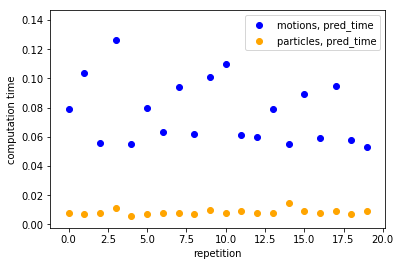

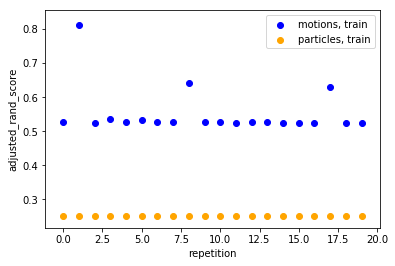

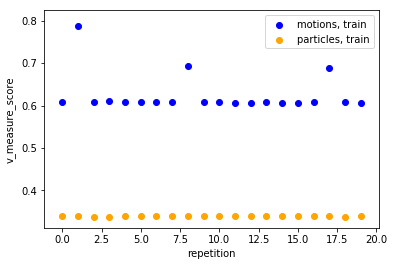

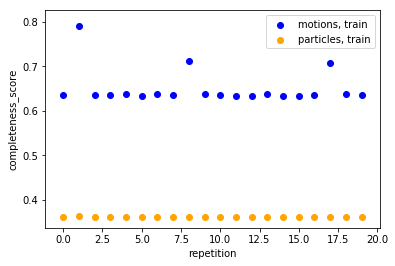

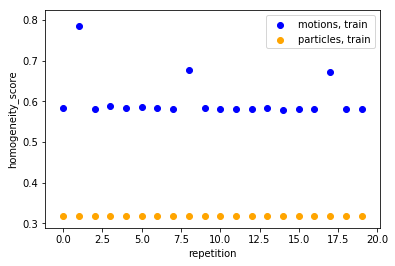

v_score variance, motions = 0.0020283404695331376
v_score variance, particles = 7.061066778998759e-09


In [51]:
## Repeatability Plots

plot_result = result7

#plot_result['param_range'].clear()
plot_result['param_range']=range(20)
plot_result['param_name']='repetition'

show_computation_time=True
if show_computation_time:
    plt.scatter(plot_result['param_range'], plot_result['time_pred_m'], color="blue", label="motions, pred_time")#, linestyle="-")
    plt.scatter(plot_result['param_range'], plot_result['time_pred_p'], color="orange", label="particles, pred_time")#, linestyle=":")
    #plt.scatter(plot_result['param_range'], plot_result['time_fit_m'], color="blue", label="motions, fit_time",
    #         linestyle="-")
    #plt.plot(plot_result['param_range'], plot_result['time_fit_p'], color="orange", label="particles, fit_time",
    #         linestyle="-")
    plt.ylabel("computation time")
    plt.xlabel(plot_result['param_name'])
    plt.legend()
    plt.show()

log_likely_score=False
if log_likely_score:
    plt.scatter(plot_result['param_range'], plot_result['score_m'], color="blue", label="motions, train")#, linestyle=":")
    plt.scatter(plot_result['param_range'], plot_result['score_p'], color="orange", label="particles, train")#, linestyle=":")
    #plt.plot(plot_result['param_range'], plot_result['score_val_m'], color="blue", label="motions, val", linestyle="-")
    #plt.plot(plot_result['param_range'], plot_result['score_val_p'], color="orange", label="particles, val", linestyle="-")
    plt.ylabel("normalized log_likelihood score")
    plt.xlabel(plot_result['param_name'])
    plt.legend()
    plt.show()


for metric in plot_result['metrics']:
    plt.scatter(plot_result['param_range'], plot_result[metric+'_m'], color="blue", label="motions, train")#, linestyle=':')
    plt.scatter(plot_result['param_range'], plot_result[metric+'_p'], color="orange", label="particles, train")#, linestyle=':')
    #plt.scatter(plot_result['param_range'], plot_result[metric+'_val_m'], color="blue", label="motions, val", linestyle='-')
    #plt.scatter(plot_result['param_range'], plot_result[metric+'_val_p'], color="orange", label="particles, val", linestyle='-')
    plt.ylabel(metric)
    plt.xlabel(plot_result['param_name'])
    plt.legend()
    plt.show()

print("v_score variance, motions = {}".format(np.var(plot_result['v_measure_score_m'])))
print("v_score variance, particles = {}".format(np.var(plot_result['v_measure_score_p'])))

In [32]:
print(result6['v_measure_score_m'])

[0.011364770665931882, 0.015065126174366616, 0.016886002240389577, 0.00866407068850932, 0.017368304194036642, 0.014636985647091186, 0.008148745255666858, 0.015792674600957807, 0.013949218908389493, 0.011349672194680784, 0.017845367191016908, 0.014980166329969893, 0.016896586433491532, 0.016439266740192204, 0.013284713469822438, 0.01233635042603374, 0.008515860796091193, 0.014039268867422685, 0.009702942989107264, 0.013575557443872309]
